# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![image.png](attachment:image.png)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


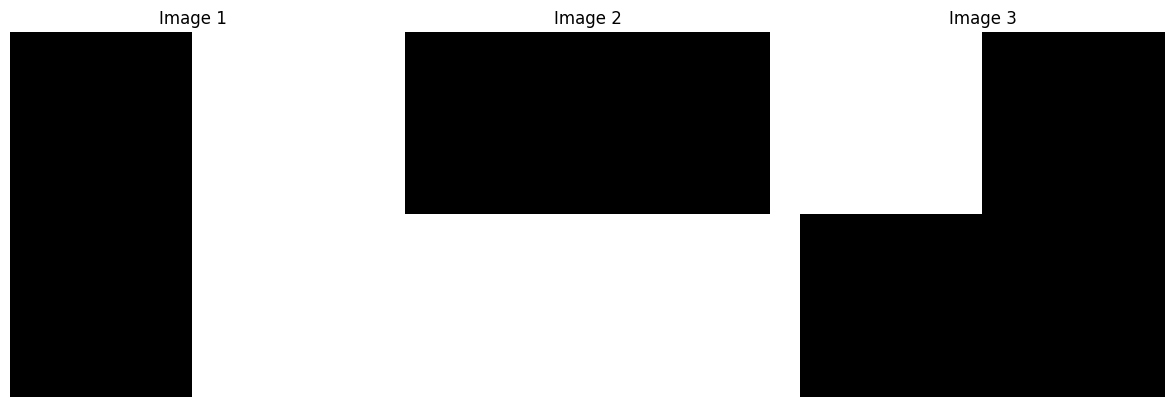

In [3]:
# solution
# Create 100x100 arrays
image1 = np.zeros((100, 100))  # All black
image2 = np.zeros((100, 100))  # All black
image3 = np.zeros((100, 100))  # All black

# Modify the arrays for each pattern
# Image 1: Left half black, right half white
image1[:, :50] = 0  # Left half (already black)
image1[:, 50:] = 1  # Right half white

# Image 2: Top half black, bottom half white
image2[:50, :] = 0  # Top half (already black)
image2[50:, :] = 1  # Bottom half white

# Image 3: Top-left quarter white, the rest black
image3[:50, :50] = 1  # Top-left quarter white
# Rest is already black

# Visualize the images in a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image1, cmap='gray')
axes[0].set_title("Image 1")
axes[0].axis('off')

axes[1].imshow(image2, cmap='gray')
axes[1].set_title("Image 2")
axes[1].axis('off')

axes[2].imshow(image3, cmap='gray')
axes[2].set_title("Image 3")
axes[2].axis('off')

plt.tight_layout()
plt.show()


*   Use the above three images to create the following image

![image-2.png](attachment:image-2.png)
*Hint: Remember channels and color spaces*

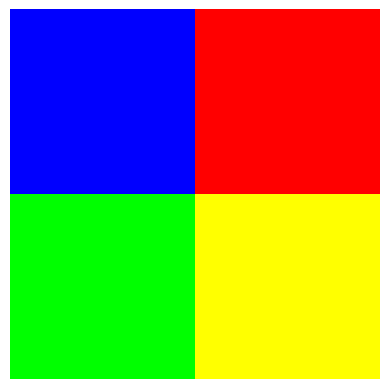

In [4]:
# solution
# Create a 100x100x3 array for an RGB image
image = np.zeros((100, 100, 3))

# Define colors for each quadrant
# Top-left: Blue
image[:50, :50, 2] = 1  # Blue channel

# Top-right: Red
image[:50, 50:, 0] = 1  # Red channel

# Bottom-left: Green
image[50:, :50, 1] = 1  # Green channel

# Bottom-right: Yellow (Red + Green)
image[50:, 50:, 0] = 1  # Red channel
image[50:, 50:, 1] = 1  # Green channel

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![image.png](attachment:image.png)

*   Extract individual channels and plot them using matplotlib subplot.



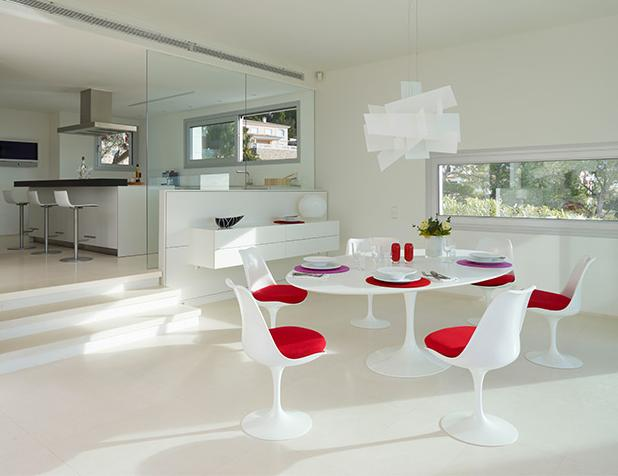

In [6]:
# solution
import cv2
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('sillas.jpg')
cv2_imshow(image)


In [7]:
# Extract individual channels and plot them using matplotlib subplot

sillas = cv2.imread('sillas.jpg')
blue_channel = sillas[:, :, 0]
green_channel = sillas[:, :, 1]
red_channel = sillas[:, :, 2]

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

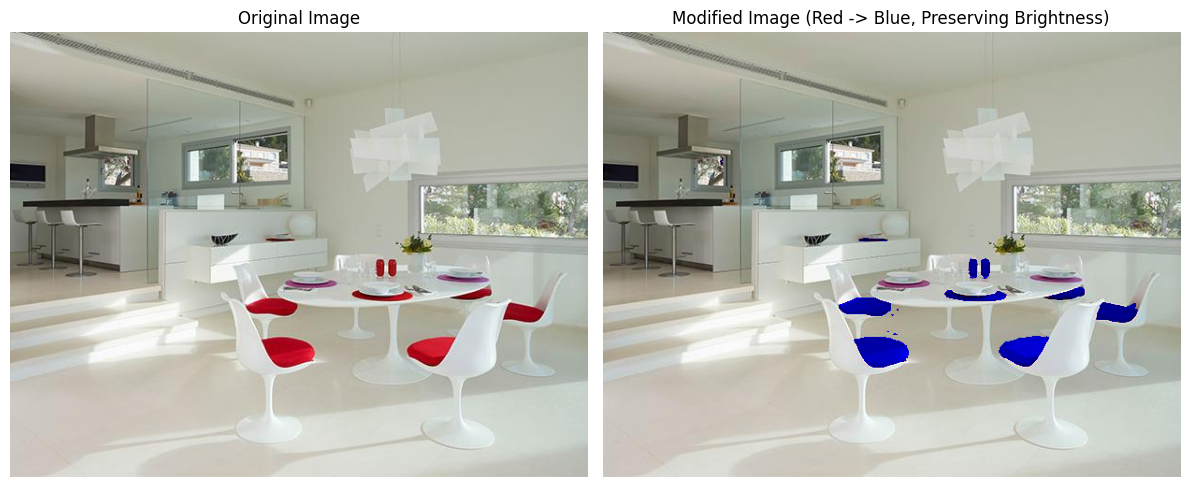

In [8]:
# solution
# Create a new image where everything that is 'red' is changed to 'blue'
# Convert the image to HSV color space
hsv_sillas = cv2.cvtColor(sillas, cv2.COLOR_BGR2HSV)

# Define a range to detect "red" in HSV
lower_red1 = np.array([0, 50, 50])     # Lower bound for red (hue around 0)
upper_red1 = np.array([10, 255, 255])  # Upper bound for red
lower_red2 = np.array([170, 50, 50])   # Another range for red (hue around 180)
upper_red2 = np.array([180, 255, 255]) # Upper bound for red

# Create masks for red
mask1 = cv2.inRange(hsv_sillas, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_sillas, lower_red2, upper_red2)
red_mask = mask1 | mask2  # Combine both masks

# Replace red pixels with blue, preserving brightness
blue_sillas = sillas.copy()
blue_sillas_hsv = cv2.cvtColor(blue_sillas, cv2.COLOR_BGR2HSV)  # Convert to HSV to edit brightness
blue_sillas_hsv[red_mask > 0, 0] = 120  # Hue for blue (120° in HSV)
blue_sillas_hsv[red_mask > 0, 1] = 255  # Saturation for vivid blue
# Preserve the original brightness (Value channel)
blue_sillas_hsv[red_mask > 0, 2] = hsv_sillas[red_mask > 0, 2]

# Convert back to BGR
blue_sillas = cv2.cvtColor(blue_sillas_hsv, cv2.COLOR_HSV2BGR)

# Visualize the original and modified images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(cv2.cvtColor(sillas, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
axes[0].set_title("Original Image")
axes[0].axis('off')

# Modified image
axes[1].imshow(cv2.cvtColor(blue_sillas, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
axes[1].set_title("Modified Image (Red -> Blue, Preserving Brightness)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![image.png](attachment:image.png)

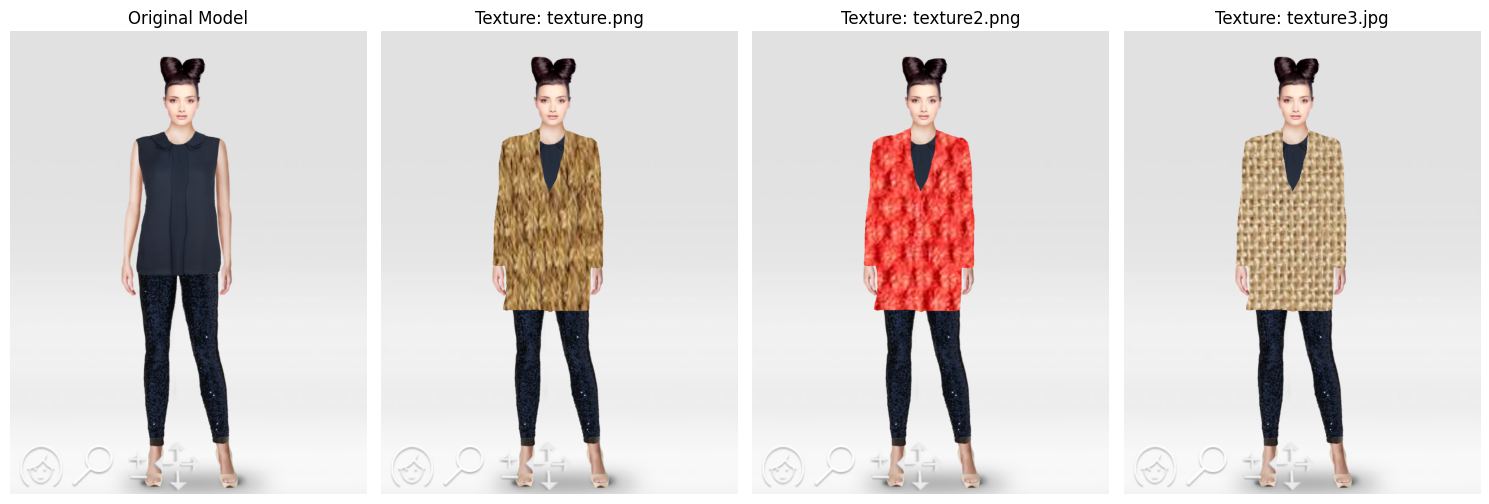

In [12]:
# solution
# List of texture files
texture_files = ['texture.png', 'texture2.png', 'texture3.jpg']

# Load the model and coat images
model = cv2.imread('model.png')
coat = cv2.imread('coat.png')

# Create a binary mask from the coat image
gray_coat = cv2.cvtColor(coat, cv2.COLOR_BGR2GRAY)
_, coat_mask = cv2.threshold(gray_coat, 1, 255, cv2.THRESH_BINARY)

# Invert the coat mask
coat_mask_inv = cv2.bitwise_not(coat_mask)

# Extract the region of the model where the coat will be placed
roi = model[:coat.shape[0], :coat.shape[1]]

# Process each texture
fig, axes = plt.subplots(1, len(texture_files) + 1, figsize=(15, 8))

# Display the original model
axes[0].imshow(cv2.cvtColor(model, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Model")
axes[0].axis('off')

# Apply each texture and visualize
for i, texture_file in enumerate(texture_files):
    # Load the texture
    texture = cv2.imread(texture_file)

    # Resize the texture to match the coat's dimensions
    texture = cv2.resize(texture, (coat.shape[1], coat.shape[0]))

    # Apply the texture to the coat
    textured_coat = cv2.bitwise_and(texture, texture, mask=coat_mask)

    # Mask out the area of the coat in the ROI
    model_bg = cv2.bitwise_and(roi, roi, mask=coat_mask_inv)

    # Combine the textured coat with the model background
    combined = cv2.add(model_bg, textured_coat)

    # Place the combined coat back onto the model
    result = model.copy()
    result[:coat.shape[0], :coat.shape[1]] = combined

    # Display the model with the textured coat
    axes[i + 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[i + 1].set_title(f"Texture: {texture_file}")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




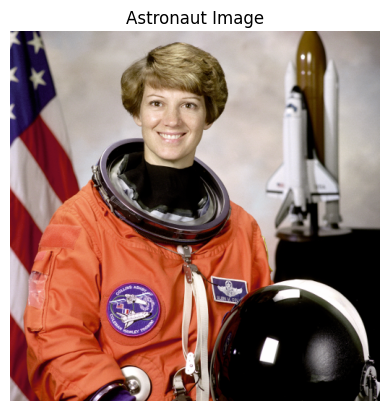

In [13]:
# solution
from skimage import data
astronaut = data.astronaut()

# Display the image
plt.imshow(astronaut)
plt.title("Astronaut Image")
plt.axis('off')
plt.show()


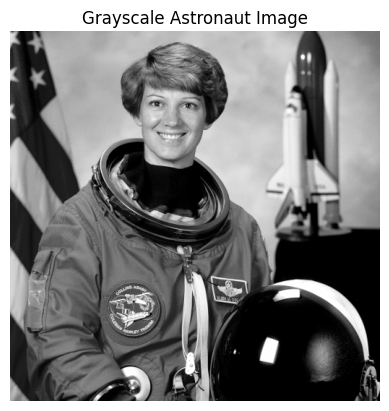

In [15]:
# Convert the image to grayscale
gray_astronaut = cv2.cvtColor(astronaut, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_astronaut, cmap='gray')
plt.title("Grayscale Astronaut Image")
plt.axis('off')
plt.show()

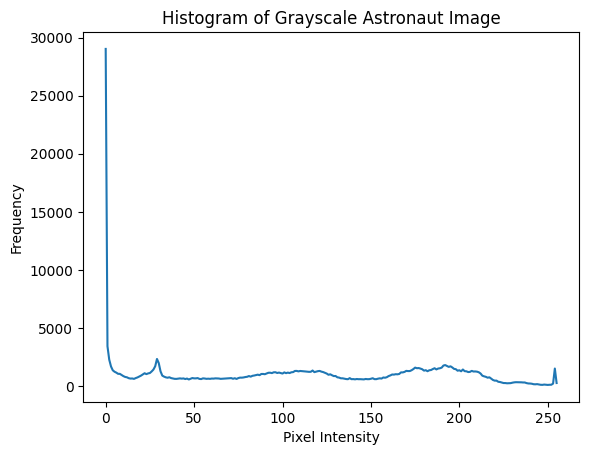

In [16]:
from skimage.exposure import histogram

# Compute histogram
hist, bins = histogram(gray_astronaut)

# Plot the histogram
plt.plot(bins, hist)
plt.title("Histogram of Grayscale Astronaut Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

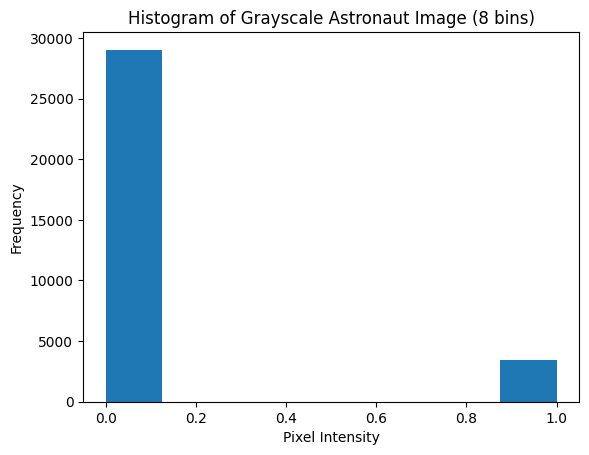

In [17]:
# solution
# Change the bin count to 8
hist, bins = np.histogram(gray_astronaut.ravel(), bins=8, range=(0, 1))

# Compute the histogram of the image
plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), align='edge')
plt.title("Histogram of Grayscale Astronaut Image (8 bins)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



When the bin count is lowered, the intensity of the pixels are concentrated in less bins. With more bins, the histogram show the distribution in more details.

The inference changes for less details with fewer bins, or more details with more bins.

The correct bin depends on the needs. For as quick overview, fewer bins are enough to detect general trends. The higher number of bins is interesting for when you want to know more details about intensity of the pixels, for example.

If the count is very low, the histogram might become too simplified and details and variations are lost.

If he count is too hight, the number of details might cause a lot of noise, making it harder to interpretate.